In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = 'Investment Data 2020-2024 (1).xlsx'
sheet_name = 'Company MetaData-2024'
df = pd.read_excel(file_path, sheet_name=sheet_name)


# Display the original columns
print("Original Columns:", df.columns)

Original Columns: Index(['Row Number', 'Company Name', 'Ticker Symbol',
       'Date of First (Oldest)\n Purchase',
       'Date of Last (Most Recent) \nPurchase',
       'Total Number of Shares\nPurchased',
       'Total Number of Shares after Split', 'Total Purchase Amount',
       'Average Price per Share \n(=Total Purchase Amount / Total Number of Shares)',
       'Average Price per Share after Split   (=Total Purchase Amount / Total Number of Shares after Split)',
       'Date of First (Oldest) \nSell', 'Date of Last (Most Recent) \nSell',
       'Total Number of Shares Sold',
       'Total Number of Shares Sold after Split', 'Total Sales Amount',
       'Average Sale Price per Share (=Total Sale Amount / Total Number of Shares Sold)\n',
       '"Average Sale Price per Share after split  (=Total Sale Amount / Total Number of Shares Sold after split)\n"',
       'Net Total Number of Shares (=Purchased - Sold)\n',
       'Net Total Number of Shares after Split',
       'Current Shar

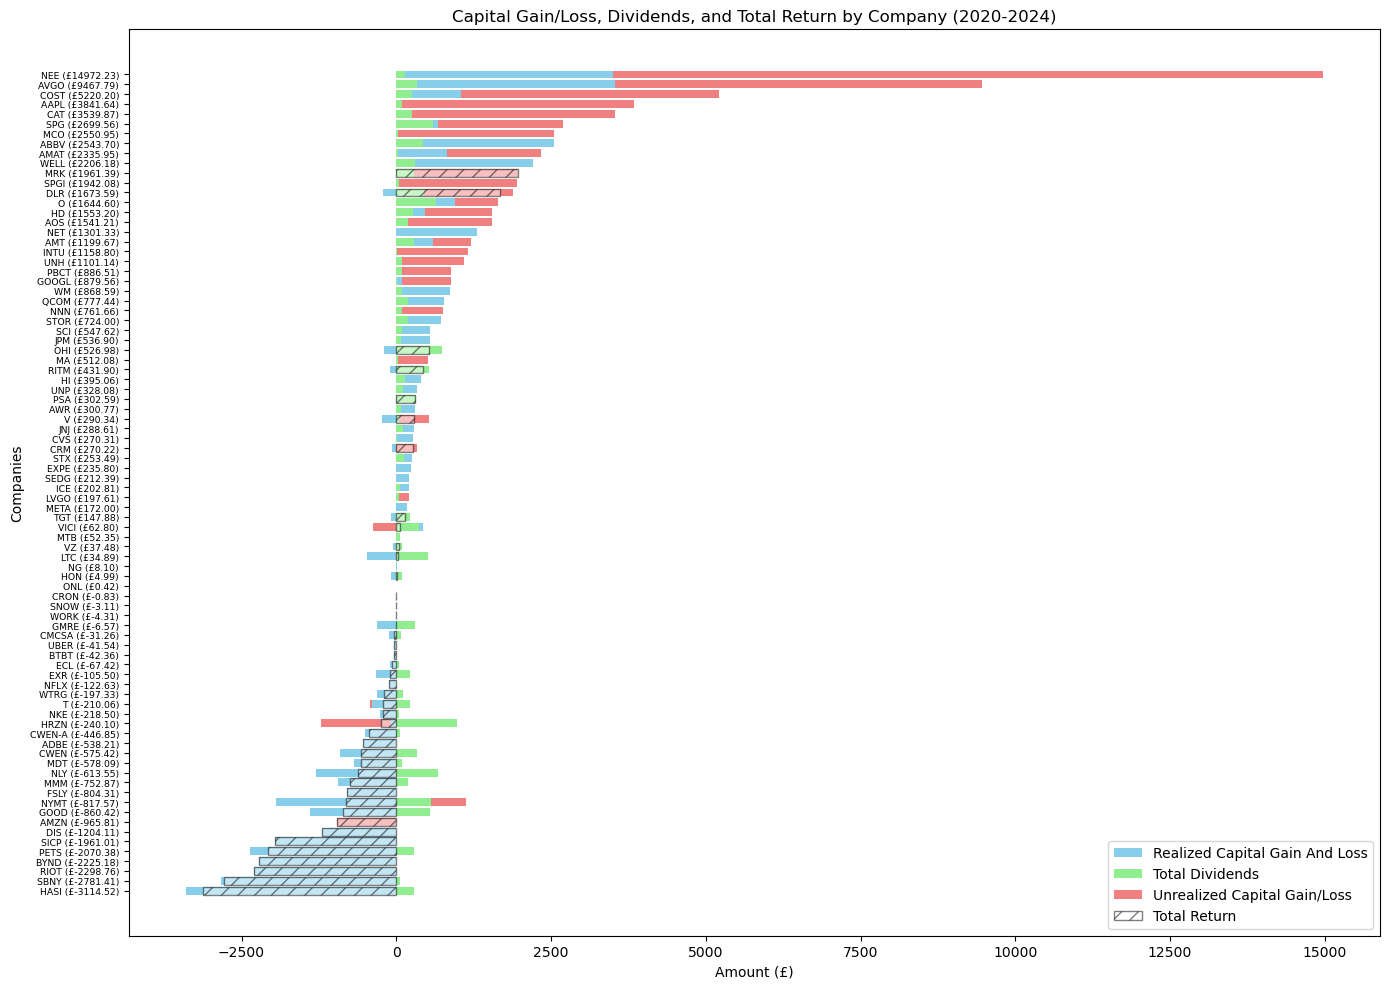

In [8]:
# Handling potential NaN values in the data
df = df.fillna(0)
df['Company Name'] = df['Company Name'].astype(str)

# Remove rows where all specified values are zero
df = df[(df[['Total Dividends ', 
             'Realized Capital Gain & Loss after Stock Split', 
             'Unrealized Capital Gains after Stock Split']] != 0).any(axis=1)]

# Calculating total return using the new columns
df['Total_Return_1'] = df['Total Dividends '] + \
                       df['Realized Capital Gain & Loss after Stock Split'] + \
                       df['Unrealized Capital Gains after Stock Split']

df['total_captital_gain&loss'] = df['Realized Capital Gain & Loss after Stock Split'] + \
                                 df['Unrealized Capital Gains after Stock Split']

# Sorting data by Total Return
company_data_sorted_1 = df.sort_values(by='Total_Return_1')

# Formatting the y-axis labels
y_labels_1 = [f'{name} (£{ret:.2f})' for name, ret in zip(company_data_sorted_1['Ticker Symbol'], company_data_sorted_1['Total_Return_1'])]

# Plotting the stacked bar chart for the first plot
fig, ax = plt.subplots(figsize=(14, 10)) 


# Plotting Unrealized Capital Gain/Loss based on whether it is positive or negative
for index in range(len(company_data_sorted_1)):
    left_position = company_data_sorted_1['Total Dividends '].iloc[index]
    right_position = 0 
    if company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].iloc[index] > 0:
        left_position += company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].iloc[index]
        # Plotting the bars for Realized Capital Gain/Loss and Dividends
        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'], 
                left = company_data_sorted_1['Total Dividends '].clip(lower=0), 
                color='skyblue', label='Realized Capital Gain And Loss'if index == 0 else "")

        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Total Dividends '], 
                #left=company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].clip(lower=0), 
                color='lightgreen', label='Total Dividends'if index == 0 else "")
    else:
        right_position = company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].iloc[index]
        # Plotting the bars for Realized Capital Gain/Loss and Dividends
        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'], 
                #left = company_data_sorted_1['Total Dividends '].clip(lower=0), 
                color='skyblue', label='Realized Capital Gain And Loss'if index == 0 else "")

        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Total Dividends '], 
                left=company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].clip(lower=0), 
                color='lightgreen', label='Total Dividends'if index == 0 else "")
        
    
    if company_data_sorted_1['Unrealized Capital Gains after Stock Split'].iloc[index] >= 0:
        # Unrealized Gain is Positive
        ax.barh(company_data_sorted_1['Ticker Symbol'].iloc[index], 
                company_data_sorted_1['Unrealized Capital Gains after Stock Split'].iloc[index], 
                left=left_position, 
                color='lightcoral', label='Unrealized Capital Gain/Loss' if index == 0 else "")
    else:
        # Unrealized Gain is Negative, plot it to the right
        ax.barh(company_data_sorted_1['Ticker Symbol'].iloc[index], 
                company_data_sorted_1['Unrealized Capital Gains after Stock Split'].iloc[index], 
                left=right_position, 
                color='lightcoral', label='Unrealized Capital Gain/Loss' if index == 0 else "")

# Highlight Total Return if either Realized Capital Gain/Loss or Unrealized Capital Gain/Loss is negative
for index, (realized, unrealized) in enumerate(zip(company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'], 
                                                   company_data_sorted_1['Unrealized Capital Gains after Stock Split'])):
    if realized < 0 or unrealized < 0:
        ax.barh(company_data_sorted_1['Ticker Symbol'].iloc[index], company_data_sorted_1['Total_Return_1'].iloc[index], color='white', edgecolor='black', hatch='//', alpha=0.5, label='Total Return' if index == 0 else "")

# Adding total return values beside the company names on the y-axis
ax.set_yticks(range(len(company_data_sorted_1['Ticker Symbol'])))
ax.set_yticklabels(y_labels_1, fontsize=6.7)

# Adding labels and title
ax.set_xlabel('Amount (£)')
ax.set_ylabel('Companies')
ax.set_title('Capital Gain/Loss, Dividends, and Total Return by Company (2020-2024)')
ax.legend()

plt.tight_layout()
plt.show()

#corrrect

In [10]:
# Sorting data by Total Return
company_data_sorted = df.sort_values(by='Total_Return_1', ascending=False)

# Display a preview of the sorted data
import ace_tools as tools; 
tools.display_dataframe_to_user(name="Sorted Company Data 2020-2024", dataframe=company_data_sorted)

ModuleNotFoundError: No module named 'ace_tools'

In [3]:
sheet_name = 'Company MetaData-2023'
df = pd.read_excel(file_path, sheet_name=sheet_name)


# Display the original columns
print("Original Columns:", df.columns)

Original Columns: Index(['Row Number', 'Company Name', 'Ticker Symbol',
       'Date of First (Oldest)\n Purchase',
       'Date of Last (Most Recent) \nPurchase',
       'Total Number of Shares\nPurchased',
       'Total Number of Shares after Split', 'Total Purchase Amount',
       'Average Price per Share \n(=Total Purchase Amount / Total Number of Shares)',
       'Average Price per Share after Split   (=Total Purchase Amount / Total Number of Shares after Split)',
       'Date of First (Oldest) \nSell', 'Date of Last (Most Recent) \nSell',
       'Total Number of Shares Sold',
       'Total Number of Shares Sold after Split', 'Total Sales Amount',
       'Average Sale Price per Share (=Total Sale Amount / Total Number of Shares Sold)\n',
       '"Average Sale Price per Share after split  (=Total Sale Amount / Total Number of Shares Sold after split)\n"',
       'Net Total Number of Shares (=Purchased-Sold)\n',
       'Net Total Number of Shares after Split',
       'Current Share 

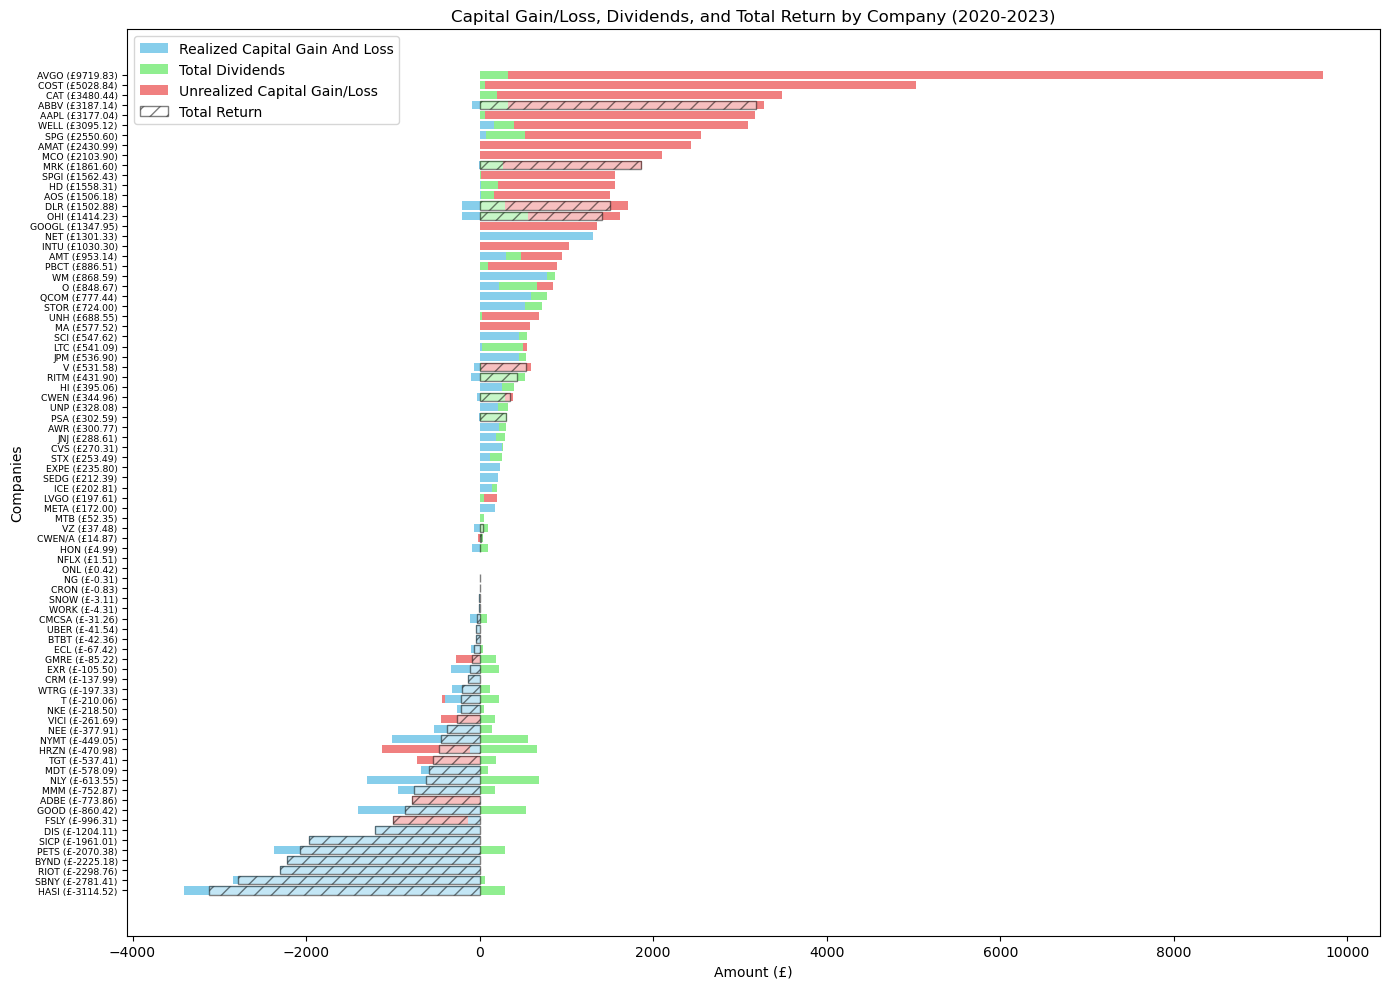

In [5]:
# Handling potential NaN values in the data
df = df.fillna(0)
df['Company Name'] = df['Company Name'].astype(str)

# Remove rows where all specified values are zero
df = df[(df[['Total Dividends ', 
             'Realized Capital Gain & Loss after Stock Split', 
             'Unrealized Capital Gains after Stock Split']] != 0).any(axis=1)]

# Calculating total return using the new columns
df['Total_Return_1'] = df['Total Dividends '] + \
                       df['Realized Capital Gain & Loss after Stock Split'] + \
                       df['Unrealized Capital Gains after Stock Split']

df['total_captital_gain&loss'] = df['Realized Capital Gain & Loss after Stock Split'] + \
                                 df['Unrealized Capital Gains after Stock Split']

# Sorting data by Total Return
company_data_sorted_1 = df.sort_values(by='Total_Return_1')

# Formatting the y-axis labels
y_labels_1 = [f'{name} (£{ret:.2f})' for name, ret in zip(company_data_sorted_1['Ticker Symbol'], company_data_sorted_1['Total_Return_1'])]

# Plotting the stacked bar chart for the first plot
fig, ax = plt.subplots(figsize=(14, 10)) 

# Plotting Unrealized Capital Gain/Loss based on whether it is positive or negative
for index in range(len(company_data_sorted_1)):
    left_position = company_data_sorted_1['Total Dividends '].iloc[index]
    right_position = 0 
    if company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].iloc[index] > 0:
        left_position += company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].iloc[index]
        # Plotting the bars for Realized Capital Gain/Loss and Dividends
        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'], 
                left = company_data_sorted_1['Total Dividends '].clip(lower=0), 
                color='skyblue', label='Realized Capital Gain And Loss'if index == 0 else "")

        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Total Dividends '], 
                #left=company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].clip(lower=0), 
                color='lightgreen', label='Total Dividends'if index == 0 else "")
    else:
        right_position = company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].iloc[index]
        # Plotting the bars for Realized Capital Gain/Loss and Dividends
        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'], 
                #left = company_data_sorted_1['Total Dividends '].clip(lower=0), 
                color='skyblue', label='Realized Capital Gain And Loss'if index == 0 else "")

        ax.barh(company_data_sorted_1['Ticker Symbol'], 
                company_data_sorted_1['Total Dividends '], 
                left=company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'].clip(lower=0), 
                color='lightgreen', label='Total Dividends'if index == 0 else "")
        
    
    if company_data_sorted_1['Unrealized Capital Gains after Stock Split'].iloc[index] >= 0:
        # Unrealized Gain is Positive
        ax.barh(company_data_sorted_1['Ticker Symbol'].iloc[index], 
                company_data_sorted_1['Unrealized Capital Gains after Stock Split'].iloc[index], 
                left=left_position, 
                color='lightcoral', label='Unrealized Capital Gain/Loss' if index == 0 else "")
    else:
        # Unrealized Gain is Negative, plot it to the right
        ax.barh(company_data_sorted_1['Ticker Symbol'].iloc[index], 
                company_data_sorted_1['Unrealized Capital Gains after Stock Split'].iloc[index], 
                left=right_position, 
                color='lightcoral', label='Unrealized Capital Gain/Loss' if index == 0 else "")

# Highlight Total Return if either Realized Capital Gain/Loss or Unrealized Capital Gain/Loss is negative
for index, (realized, unrealized) in enumerate(zip(company_data_sorted_1['Realized Capital Gain & Loss after Stock Split'], 
                                                   company_data_sorted_1['Unrealized Capital Gains after Stock Split'])):
    if realized < 0 or unrealized < 0:
        ax.barh(company_data_sorted_1['Ticker Symbol'].iloc[index], company_data_sorted_1['Total_Return_1'].iloc[index], color='white', edgecolor='black', hatch='//', alpha=0.5, label='Total Return' if index == 0 else "")

# Adding total return values beside the company names on the y-axis
ax.set_yticks(range(len(company_data_sorted_1['Ticker Symbol'])))
ax.set_yticklabels(y_labels_1, fontsize=6.7)

# Adding labels and title
ax.set_xlabel('Amount (£)')
ax.set_ylabel('Companies')
ax.set_title('Capital Gain/Loss, Dividends, and Total Return by Company (2020-2023)')
ax.legend()

plt.tight_layout()
plt.show()

#corrrect